#### Exercice 15

Le programme pour mémoire

    MOV R0, #255
    STR R0, 68
    HALT
    LDR R1, 72
    HALT
    
Copier une copie d'écran de la mémoire qui met en valeur ce qui a changé dans la mémoire au premier `HALT`.

> 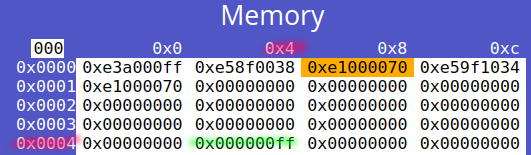
>
> La valeur décimal de 0x44 est ...

Expliquer pourquoi la valeur montrée est ce qu'elle est (*what*), et est où elle est (*where*).

> *what*: La valeur du mot mémoire modifié, 0xff, correspond à 255 (dans R0) en décimal. Or nous avons expressément demandé d'enregistrer cette valeur en mémoire STR **R0**, 68.
>
> *where*: le mot mémoire modifié a pour adresse 0x44 soit 4\*16+4=68 en décimal qui est bien la deuxième opérande de `STR`. Remarquer qu'elle n'est pas préfixée par `#` car ce n'est pas une valeur au sens de «contenu d'un registre ou d'un mot mémoire».

À présent, cliquer sur la position mémoire immédiatement à droite de celle qui a été modifiée, et y saisir une valeur. Relancer l'exécution (en appuyant sur Play) et montrer, avec une copie d'écran partielle, que la valeur saisie précédemment a été copiée ('loaded') dans `R1`.

> Je saisi 0xff00 dans le mot mémoire suivant
>
> 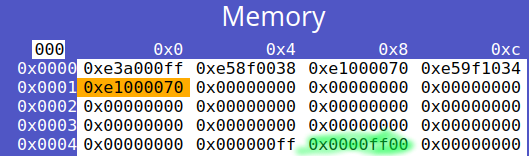
>
> L'instruction LDR R2, 72 a bien pour effet de charger le mot saisi dans le registre R2:
>
> 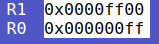

Pourquoi la deuxième opérande pour l'instruction `LDR` est 72 et pas 69? Que se passe-t-il si vous mettez 69 et que vous relancer l'exécution?

> 69 est l'adresse du deuxième octet du mot mémoire d'adresse 68; les adresses des mots mémoires consécutifs augmentent de 4 en 4 et 72 = 8 + 4
>
> Si on met 69 à la place de 72, on obtient une erreur « *Unaligned access at line 4 LDR* » qui nous indique un problème d'alignement. Les opérations `STR` et `LDR` fonctionnent avec des **adresses de mot**. 

> **Complément**: Sachez cependant qu'il existe des opérations similaires `STRB` et `LDRB` (B pour *Byte* - octet) qui utilisent l'adresse d'un octet. Vous pourriez avoir une surprise en les utilisant car les processeurs ARM sont *petit boutistes* \[ *little endian* \] (on commence par le petit bout...). Par exemple:
>
>        MOV R0,#0x0201
>        STR R0,68
>        LDRB R1,68
>        HALT
>
> Qu'aura-t-on dans R1, 0x1 ou 0x2? Quelle adresse faut-il mettre pour obtenir l'octet qui n'a pas été obtenu?
________

#### Exercice 16

Pour mémoire:

      LDR R0, xCoord
      ADD R0, R0, #6
      STR R0, xCoord
      LDR R0, yCoord
      ADD R0, R0, #2
      STR R0, yCoord
      HALT
    xCoord: 3
    yCoord: 4

Quelles sont les adresses respectives de `xCoord` et `yCoord`?

> xCoord correspond à l'adresse 0x1c et yCoord à 0x20.

> Mémoire après avoir valider le programme mais avant de l'avoir exécuté:
> 
> 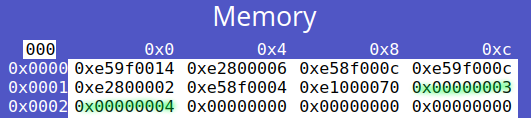

> Mémoire après exécution:
>
> 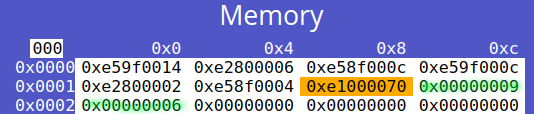
____

#### Exercice 17

Faites tourner ce programme. Lorsque le processeur se bloque en attente d'une donnée, saisir 1, 2 ou 3. Lorsque le programme se supend, prendre une capture d'écran partielle montrant la console et montrant la valeur dans `R0` qui devrait être le nombre d'allumettes restantes.

Pour rappel:

```
//R0 - allumettes restantes
//R1 - pour écrire des messages
//R2 - nombre d'allumettes à enlever
  MOV R0, #15
  STR R0, .WriteUnsignedNum
  MOV R1, #msg1
  STR R1, .WriteString
  MOV R1, #msg2
  STR R1, .WriteString
  LDR R2, .InputNum
  SUB R0, R0, R2
  HALT
msg1: .ASCIZ "restantes\n"
msg2: .ASCIZ "Combien souhaitez-vous en enlever (1-3)?\n"
```

> Je saisis 2 pour indiquer que je souhaite prendre 2 allumettes
>
> 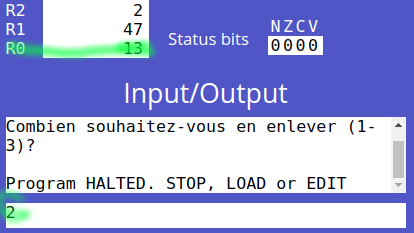

____

#### Exercice 18

Pour rappel:
```
//R0 - allumettes restantes
//R1 - pour écrire des messages
//R2 - nombre d'allumettes à enlever
  MOV R0, #15
loop: STR R0, .WriteUnsignedNum
  MOV R1, #msg1
  STR R1, .WriteString
  MOV R1, #msg2
  STR R1, .WriteString
  LDR R2, .InputNum
  SUB R0, R0, R2
  B loop
  HALT
msg1: .ASCIZ "restantes\n"
msg2: .ASCIZ "Combien souhaitez-vous en enlever (1-3)?\n"
```


Pourquoi l'étiquette `loop:` n'a-t-elle pas été placée sur la première instruction (plutôt que la seconde)? Si vous n'êtes pas sûr, expérimenter ce changement.

> Si on la place en première ligne, le compteur d'allumette est remis à 15 à chaque itération!

Même en version mono-utilisateur de ce jeu, il y a deux sérieuses limitations dans ce code. Pourriez-vous les préciser?

> 1. rien n'arrête le programme, le nombre d'allumettes fini par devenir négatif,
> 2. On peut enlever autant d'allumettes qu'on veut et non 1, 2 ou 3.
_____

#### Exercice 19

Pour rappel:

```
//R0 - allumettes restantes
//R1 - pour écrire des messages
//R2 - nombre d'allumettes à enlever
  MOV R0, #15
loop: STR R0, .WriteUnsignedNum
  MOV R1, #msg1
  STR R1, .WriteString
  MOV R1, #msg2
  STR R1, .WriteString
input: LDR R2, .InputNum
  CMP R2, #3
  BGT input
  SUB R0, R0, R2
  B loop
  HALT
msg1: .ASCIZ "restantes\n"
msg2: .ASCIZ "Combien souhaitez-vous en enlever (1-3)?\n"
```

À présent, en utilisant l'une des quatres formes possibles de branchement conditionnel présentées plus tôt, ajouter quelques instructions de manière à renforcer la règle que le nombre d'allumettes récupérées est au moins une.

>        ...
>        CMP R2, #3
>        BGT input
>        CMP R2, #1 // Vérifions que le nombre d'allumette n'est pas inférieure à 1
>        BLT input  // Si c'est le cas, on redemande ...
>        SUB ...
> 

Essayer de saisir une valeur négative. Est-ce quel le code empêche cela?

> oui, si le nombre est négatif, il y a branchement à 'input'.

Pouvez-vous trouver un moyen d'empêcher que le nombre total d'allumette puisse devenir négatif?

>         ...
>         BLT input
>         SUB R4, R0, R2 // utilisation d'un regisre temporaire
>         CMP R4, #0    
>         BLT input      // l'utilisateur enlève plus d'allumettes qu'il ne peut
>         MOV R0, R4     // ok, plaçons le résultat temporaire dans le registre adéquat
>         BGT loop       // Si il n'y a plus d'allumettes, le jeu est fini.
>         HALT

> 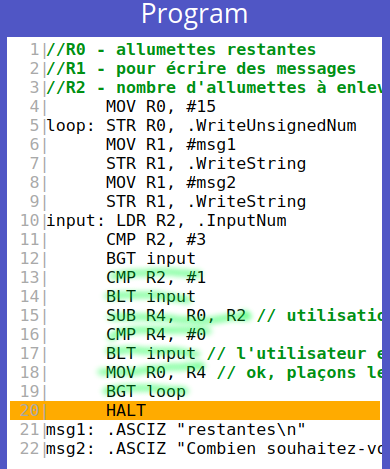
____

#### Exercice 20

Saisir et faire tourner le programme complet plus d'une fois.

Prendre une capture d'écran partiel montrant la console à la fin du jeu dans chaque cas: celui où vous gagnez, celui où l'ordinateur gagne.

Il y a en fait une stratégie très simple qui garantie la victoire si vous jouez en premier et qui vous l'assure probablement si vous jouez en second pourvu que l'autre joueur ne suive pas la même stratégie (comme dans ce cas où l'ordinateur joue au hasard).

Pouvez-vous trouver cette stratégie gagnante?

> Je gagne:
>
>     15 allumettes restantes.
>     1 prises par l'ordinateur.
>     14 allumettes restantes.
>     Combien d'allumettes voulez-vous prendre (1-3)?
>     11 allumettes restantes.
>     2 prises par l'ordinateur.
>     9 allumettes restantes.
>     Combien d'allumettes voulez-vous prendre (1-3)?
>     7 allumettes restantes.
>     1 prises par l'ordinateur.
>     6 allumettes restantes.
>     Combien d'allumettes voulez-vous prendre (1-3)?
>     3 allumettes restantes.
>     1 prises par l'ordinateur.
>     2 allumettes restantes.
>     Combien d'allumettes voulez-vous prendre (1-3)?
>     Vous gagnez!

> Je perds:
>
>     15 allumettes restantes.
>     1 prises par l'ordinateur.
>     14 allumettes restantes.
>     Combien d'allumettes voulez-vous prendre (1-3)?
>     11 allumettes restantes.
>     2 prises par l'ordinateur.
>     9 allumettes restantes.
>     Combien d'allumettes voulez-vous prendre (1-3)?
>     7 allumettes restantes.
>     3 prises par l'ordinateur.
>     4 allumettes restantes.
>     Combien d'allumettes voulez-vous prendre (1-3)?
>     2 allumettes restantes.
>     1 prises par l'ordinateur.
>     1 allumettes restantes.
>     L'ordinateur gagne! 

> Stratégie gagnante à tout les coups si on commence:
>
>> Prendre autant d'allumettes qu'il faut pour qu'il en reste toujours un multiple de 1+4\*n soit 1, 5, 9, 13.
____